In [121]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import scale

global df
df = pd.DataFrame(index=range(0,0), columns=['이름', '국어', '수학', '물리', '세계사', '분류'])

#오늘의 과제
#1)학생의 성적을 받는 로직 구현 (use dataFrame)
#2)학생의 성적을 토대로 분류 모델 머신러닝 구현 (use Classifier)

#3)문과 학생 점수와 이과 학생의 각 과목 점수가 어느쪽이 높은지 출력하시오


In [219]:
def gradeCompare() :
    global df
    #문과 학생 튜플 데이터프레임과 평균값을 추력
    lib_df = df[df.분류 == '문과']
    lib_avg = lib_df.mean(axis='rows', numeric_only=True)
    #이과 학생 튜플 데이터프레임과 평균값을 추력
    sci_df= df[df['분류'] == '이과']
    sci_avg = sci_df.mean(axis='rows', numeric_only=True)
    #문과 이과 점수를 컬럼마다 각각 비교
    count = 0
    for i in lib_avg :
        if lib_avg[count] > sci_avg[count] :
            print('문과가 ', lib_avg[count] - sci_avg[count], ' 만큼 더 높습니다')
        else :
            print('이과가 ', sci_avg[count] - lib_avg[count], ' 만큼 더 높습니다')
        count = count + 1

def insert() :
    global df
    name = input('이름을 작성하시오')
    motherTongue = input('국어 성적을 입력하시오')
    math = input('수학 성적을 입력하시오')
    physic = input('물리 성적을 입력하시오')
    history = input('세계사 성적을 입력하시오')
    category = input('분류를 작성하시오')
    df.loc[len(df)] = [name, motherTongue, math, physic, history, category]

def info() :
    global df
    print(df)

def saveCSV() :
    global df
    df.to_csv('./studentGrade.csv', index=False)

def loadCSV() :
    global df
    file_path = './studentGrade.csv'
    df = pd.read_csv(file_path)
    
#결손값, 이상치 데이터를 직관적으로 찾기 위해서
#pie, bar, line, area, box
def viewGraph() :
    global df
    plt.boxplot(df.세계사[:], vert=False)

def avgTest() :
    global df
    avg = df.mean(axis='rows', numeric_only=True)
    count = 1
    choice = 0
    print(df.iloc[0, df['수학']])
    for i in range(len(df.index)) :
        print(choice)
        print(len(df.index))
        
        if df.iloc[choice, df['수학']] + df.iloc[choice, df['과학']] >  df.iloc[choice, df['국어']] + df.iloc[choice, df['세계사']] :
            print("check")
        choice = choice + 1
        
    
#     for i in avg :
#         df.loc[df.iloc[:,count] > 100, df.columns[count]] = round(i)
#         df.loc[df.iloc[:,count] < 0, df.columns[count]] = round(i)
#         count = count + 1
    

In [220]:
#데이터 입출력
loadCSV()
gradeCompare()
# avgTest()
# while True:
#     choice = input('학생 성적을 입력하시겠습니까? (y) 혹은 끝내겠습니까?')
#     if choice == 'y': 
#         insert()
#     else :
#         info()
#         saveCSV()
#         break

문과가  54.0  만큼 더 높습니다
이과가  39.33333333333333  만큼 더 높습니다
이과가  26.250000000000004  만큼 더 높습니다
문과가  46.0  만큼 더 높습니다


In [210]:
#머신러닝 변수구간 만들기
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]
print(df.iloc[:5, :-1]) #48.6 <> 

#표준편차 : 평균에서 얼마나 떨어져 있는지를 절대값으로 표현
#*절대값 : 양수로 계산된 떨어진 범위 (음,양수를 모두 양수로 표현)
scaledTest = scale(X)
scaledTest[:5, :]

# scaledTest.mean(axis=0)

    이름  국어  수학  물리  세계사
0  김준석  10  50  50   10
1  박준석  14  60  40   20
2  이준석  50  30  40   80
3  소준석  70  10  40   50
4  대준석  99   1   2   60


array([[-1.22222879,  0.65933783,  0.38201797, -1.23022556],
       [-1.09098275,  1.12203104, -0.09303028, -0.83015221],
       [ 0.09023166, -0.2660486 , -0.09303028,  1.57028791],
       [ 0.74646188, -1.19143502, -0.09303028,  0.37006785],
       [ 1.6979957 , -1.60785892, -1.89821364,  0.77014121]])

In [116]:
#학습용 모델링 만들기
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=1)

#DecisionTreeClassifier 알고리즘으로 모델 형태 만들기
dt_model = DecisionTreeClassifier(random_state = 1)
#학습진행
dt_model.fit(train_X, train_y)
#검증진행
dt_model.predict(test_X)
dt_pred_y = dt_model.predict(test_X)
#테이블 모형으로 예측결과 출력하기
pd.crosstab(test_y, dt_pred_y)

col_0  문과  이과
분류           
문과     20   0
이과      0  22

In [117]:
#MLPClassifier 알고리즘 모델 형태 만들기
mlp_model = MLPClassifier(hidden_layer_sizes=(100,200,50,20), 
                          max_iter=500, random_state=1)
mlp_model.fit(train_X, train_y)
mlp_pred_y = mlp_model.predict(test_X)
pd.crosstab(test_y, mlp_pred_y)

col_0  문과  이과
분류           
문과     20   0
이과      0  22

In [118]:
# mlp_model.score(test_X, test_y)
mlp_model.score(train_X, train_y)

1.0

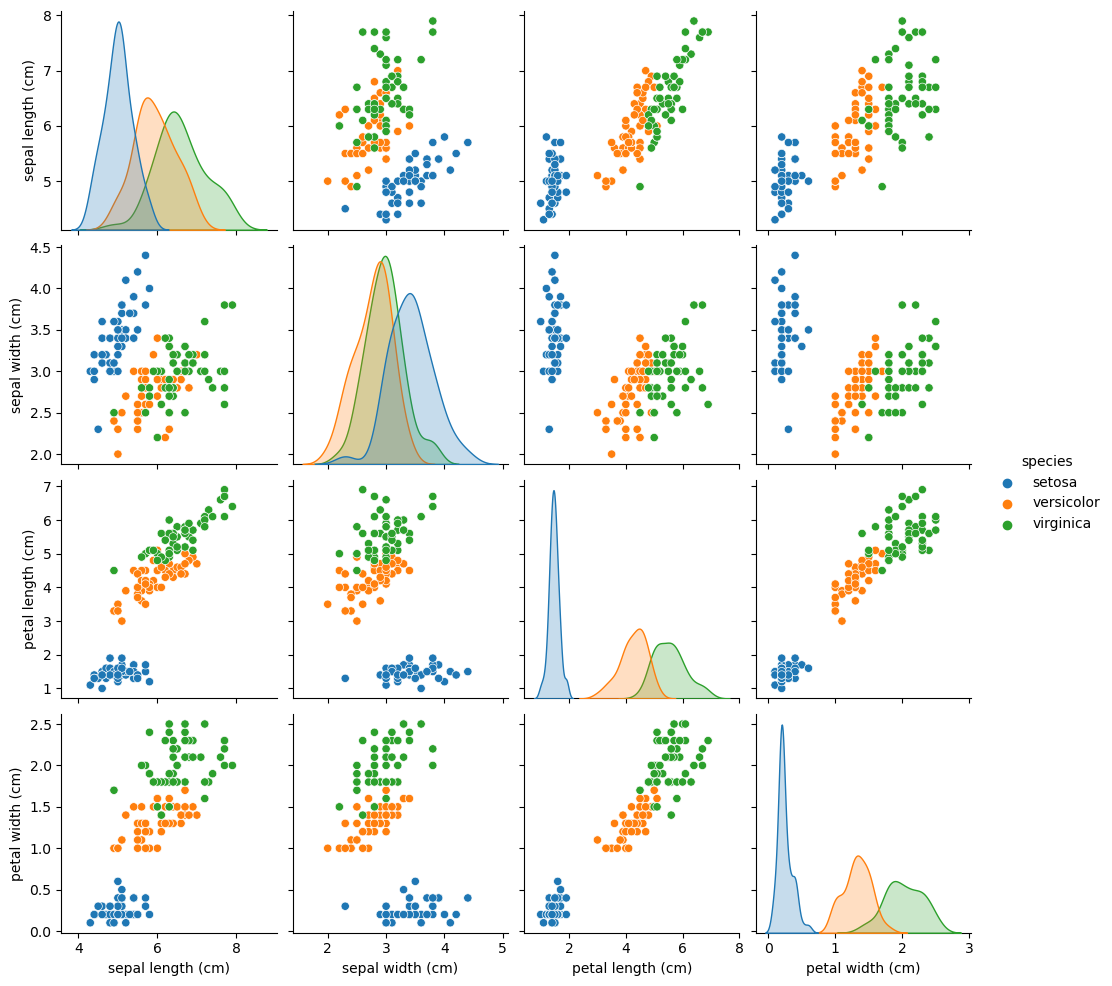

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype="category")
sy = sy.cat.rename_categories(iris.target_names)
# print(sy)
df['species'] = sy
sns.pairplot(df, hue="species")
plt.show()